In [1]:
# Importo mi Clase con las constantes declaradas con las rutas y algunos mensajes que utilizare 
from Business.constantes import MagicString
from Business.business_logic_general import General

c:\Users\JuniorLv\Documents\src\Business\constantes.py:8: SyntaxWarning: invalid escape sequence '\d'
  CONFIGURACION_GENERAL_REGULAR_EXPRESION_DIGITOS = '(\d+\.?\d*)'


In [2]:
# Lectura de nuestro recurso CSV.
Datos = General.leer_datos_csv(MagicString.HEART_RUTA)

In [3]:
# Realizo la lectura de los datos para el analisis exploratorio
General.realizar_lectura_datos_analisis(Datos.copy(),MagicString.CONFIGURACION_GENERAL_CANTIDAD_REGISTROS)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0,1,1,0,0
1,69,0,0,140,239,0,0,151,0,2,0,2,0,0
2,66,0,0,150,226,0,0,114,0,3,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1,1,1,0,1
4,64,1,0,110,211,0,2,144,1,2,1,0,0,0


In [4]:
General.describir_datos_csv(Datos.copy())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297,297,297,297,297,297,297,297,297,297,297,297,297,297
mean,55,1,2,132,247,0,1,150,0,1,1,1,1,0
std,9,0,1,18,52,0,1,23,0,1,1,1,1,0
min,29,0,0,94,126,0,0,71,0,0,0,0,0,0
25%,48,0,2,120,211,0,0,133,0,0,0,0,0,0
50%,56,1,2,130,243,0,1,153,0,1,1,0,0,0
75%,61,1,3,140,276,0,2,166,1,2,1,1,2,1
max,77,1,3,200,564,1,2,202,1,6,2,3,2,1


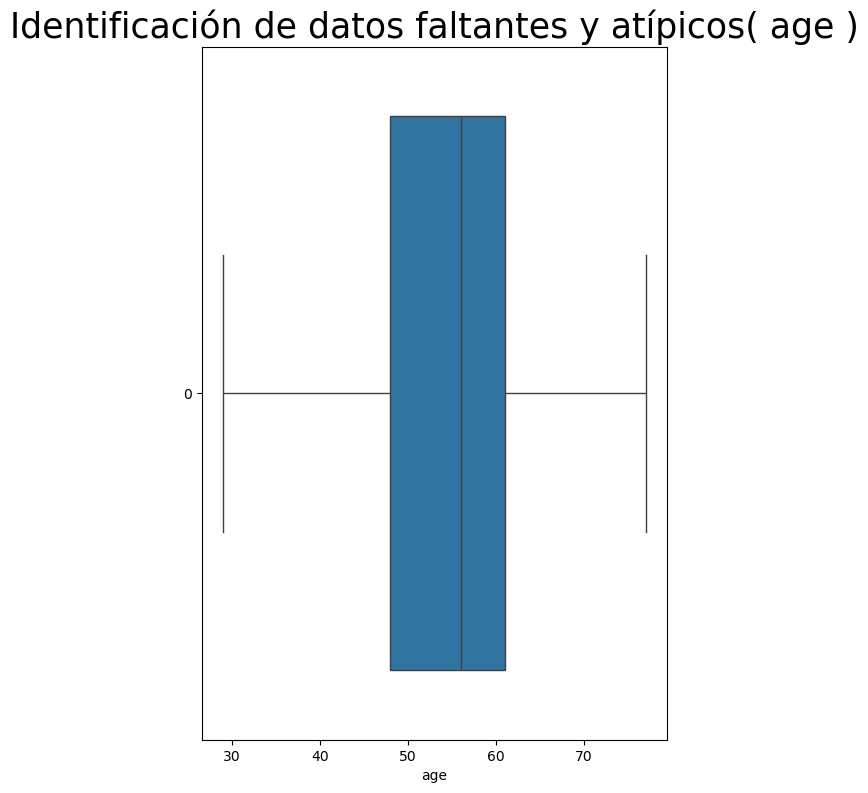

In [5]:
General.generar_grafica_datos_obtenidos(Datos.copy(),MagicString.HEART_AGE, MagicString.MENSAJE_VALORES_ATIPICOS.format(MagicString.HEART_AGE))

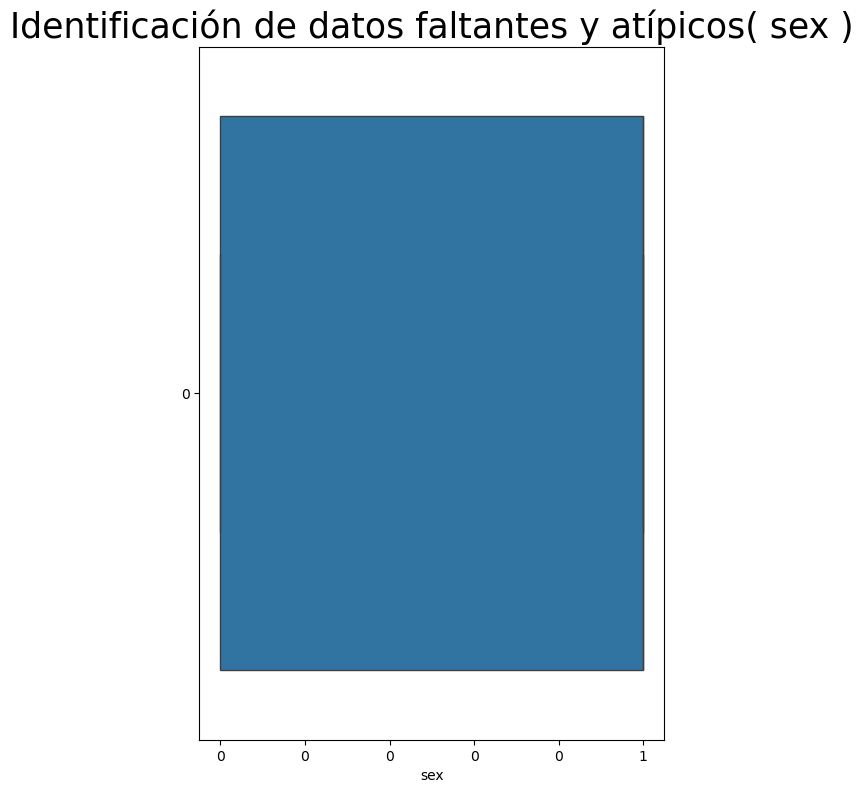

In [6]:
General.generar_grafica_datos_obtenidos(Datos.copy(),MagicString.HEART_SEX, MagicString.MENSAJE_VALORES_ATIPICOS.format(MagicString.HEART_SEX))

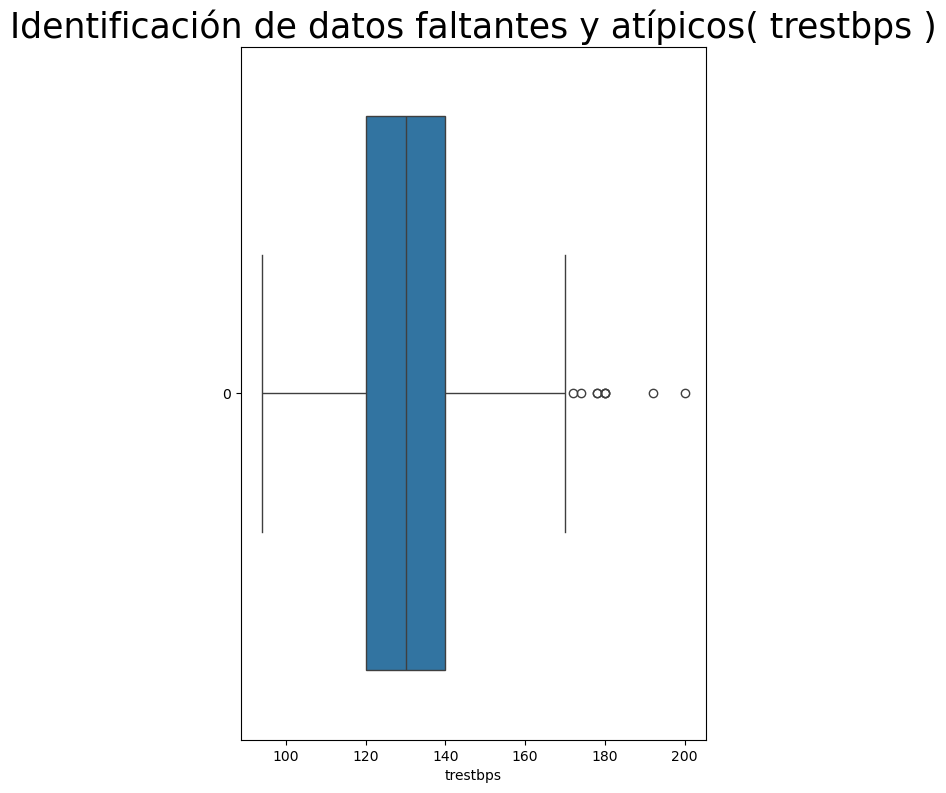

In [7]:
General.generar_grafica_datos_obtenidos(Datos.copy(),MagicString.HEART_TRESTBPS, MagicString.MENSAJE_VALORES_ATIPICOS.format(MagicString.HEART_TRESTBPS))

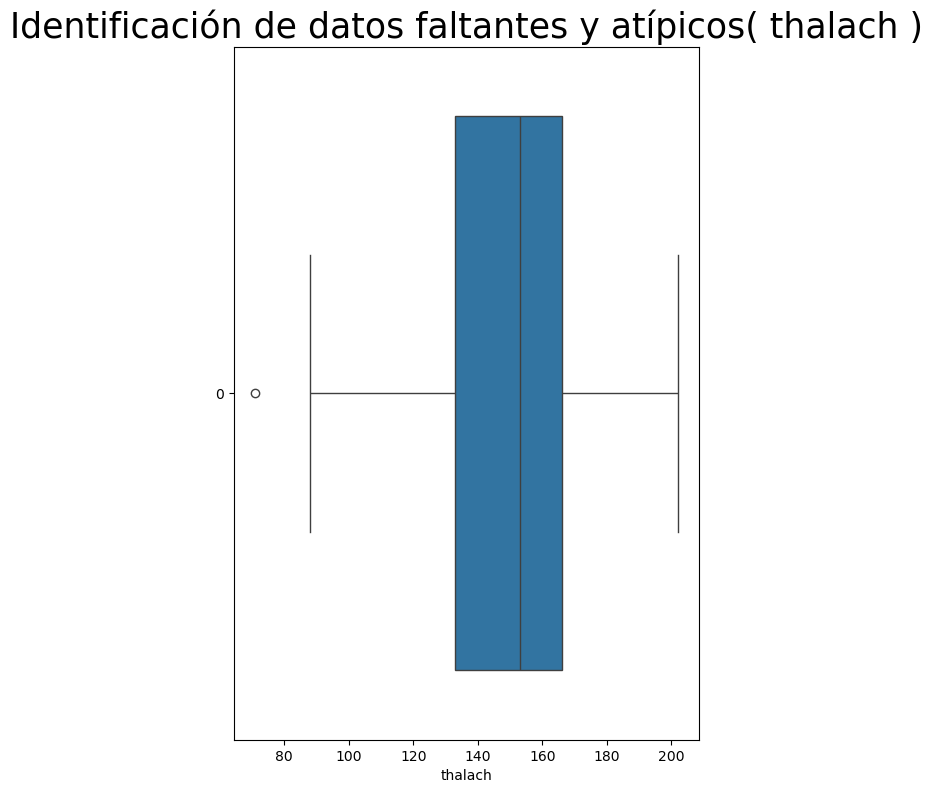

In [8]:
General.generar_grafica_datos_obtenidos(Datos.copy(),MagicString.HEART_THALACH, MagicString.MENSAJE_VALORES_ATIPICOS.format(MagicString.HEART_THALACH))

In [9]:
#Ajusto Los valores atipicos de la columna 
Datos_para_entrenamiento = Datos.copy()
Datos_para_entrenamiento[MagicString.HEART_TRESTBPS] = General.realizar_imputacion_de_datos_para_datos_atipicos(Datos_para_entrenamiento.copy(),MagicString. HEART_TRESTBPS)
Datos_para_entrenamiento[MagicString.HEART_THALACH] = General.realizar_imputacion_de_datos_para_datos_atipicos(Datos_para_entrenamiento.copy(),MagicString. HEART_THALACH)

#Compruebo si existen datos nulos en el DataFrame
Datos_para_entrenamiento.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

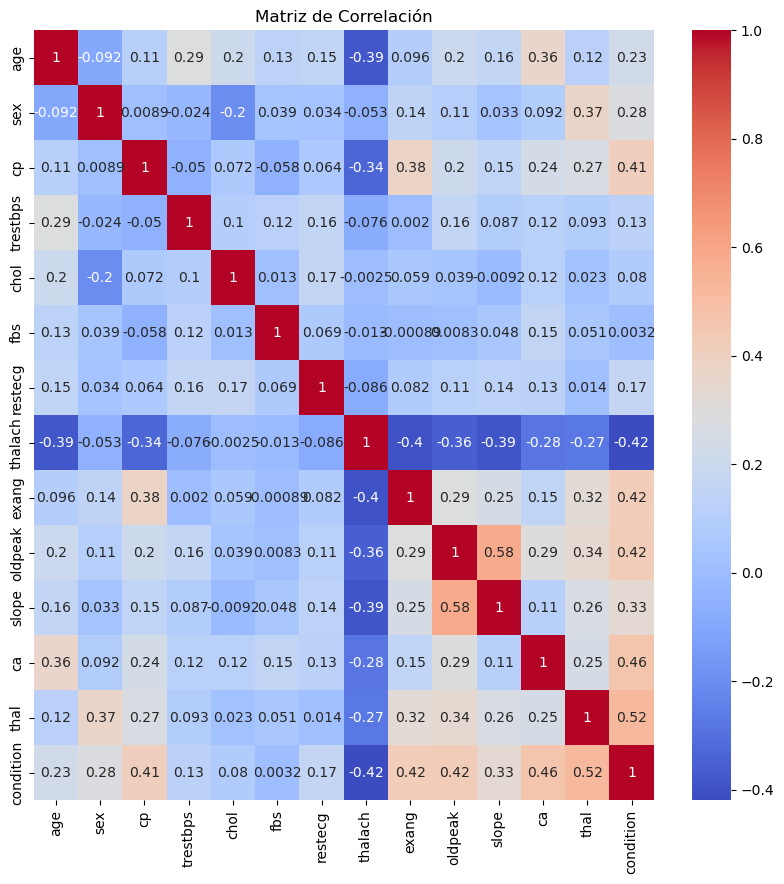

In [10]:
#Generar matriz de correlacion
General.genera_grafica_de_correlacion(Datos_para_entrenamiento)

In [11]:
# Utilizo los siguientes porcentajes para entrenamiento Train = 80% y Test = 20% tomando como referencia la columna condition
condition_train_x, condition_test_x, condition_train_y, condition_test_y = General.dividir_registros_train_y_test(Datos_para_entrenamiento, MagicString.HEART_CONDITION, 0)

# Obtengo la prediccion de mi modelo para condition
prediccion_condition = General.entrenar_modelo_regresion_logistica(condition_train_x, condition_train_y, condition_test_x)
print(condition_train_x)
print(condition_train_y)
print(prediccion_condition)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
282   43    1   3       120   177    0        2      120      1        2   
81    67    0   2       152   277    0        0      172      0        0   
108   54    1   2       120   258    0        2      147      0        0   
146   42    1   2       130   180    0        0      150      0        0   
217   58    1   3       146   218    0        0      105      0        2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
251   53    0   3       130   264    0        2      143      0        0   
192   61    1   3       120   260    0        0      140      1        4   
117   52    1   2       130   199    1        0      162      0        0   
47    52    1   1       134   201    0        0      158      0        1   
172   65    1   3       120   177    0        0      140      0        0   

     slope  ca  thal  
282      1   0     2  
81       0   1     0  
108      1   0    

In [12]:
# Evaluar el desempeño de mi modelo
General.evaluar_desempeño_modelo_presicion(prediccion_condition, condition_test_y)

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        22
           1       0.97      0.76      0.85        38

    accuracy                           0.83        60
   macro avg       0.83      0.86      0.83        60
weighted avg       0.87      0.83      0.84        60



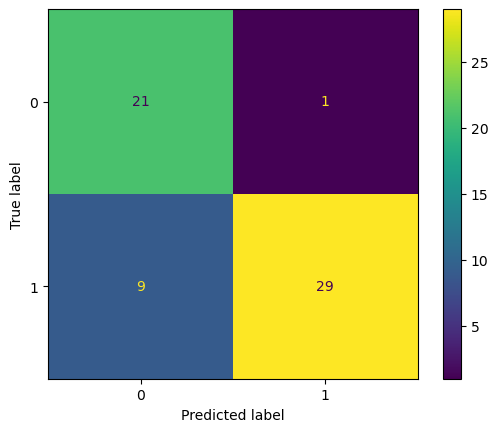

In [13]:
# Generar matriz de confusion
General.matriz_de_confusion(condition_test_y, prediccion_condition)

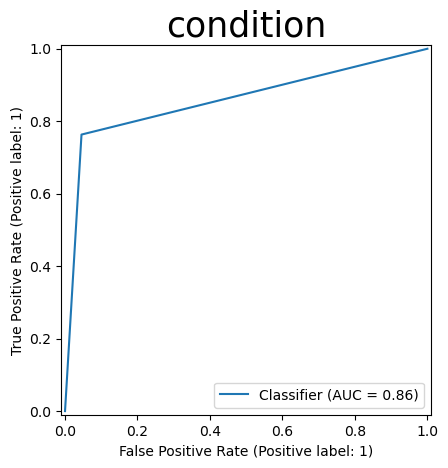

In [14]:
# Generar Curva de Precision del modelo
General.curva_de_precision_modelo(condition_test_y, prediccion_condition, MagicString.HEART_CONDITION)

In [15]:
# Realizar modelo para regresion logistica ordinal.
# Utilizo los siguientes porcentajes para entrenamiento Train = 80% y Test = 20% tomando como referencia la columna cp (chest paint type o Tipo de dolor)
cp_train_x, cp_test_x, cp_train_y, cp_test_y = General.dividir_registros_train_y_test(Datos_para_entrenamiento, MagicString.HEART_CP, 0)

# Obtengo la prediccion de mi modelo para condition
prediccion_cp = General.entrenar_modelo_regresion_logistica(cp_train_x, cp_train_y, cp_test_x)
print(cp_train_x)
print(cp_train_y)
print(prediccion_cp)

     age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
282   43    1       120   177    0        2      120      1        2      1   
81    67    0       152   277    0        0      172      0        0      0   
108   54    1       120   258    0        2      147      0        0      1   
146   42    1       130   180    0        0      150      0        0      0   
217   58    1       146   218    0        0      105      0        2      1   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...    ...   
251   53    0       130   264    0        2      143      0        0      1   
192   61    1       120   260    0        0      140      1        4      1   
117   52    1       130   199    1        0      162      0        0      0   
47    52    1       134   201    0        0      158      0        1      0   
172   65    1       120   177    0        0      140      0        0      0   

     ca  thal  condition  
282   0     2          1

In [16]:
# Evaluar el modelo
General.evaluar_desempeño_modelo_presicion(prediccion_cp, cp_test_y)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.20      0.12      0.15         8
           2       0.46      0.46      0.46        13
           3       0.69      0.88      0.77        33

    accuracy                           0.60        60
   macro avg       0.34      0.37      0.35        60
weighted avg       0.51      0.60      0.55        60



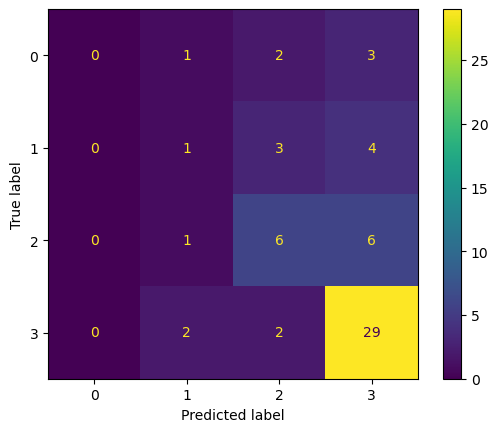

In [17]:
# Generar matriz de confusion
General.matriz_de_confusion(cp_test_y, prediccion_cp)

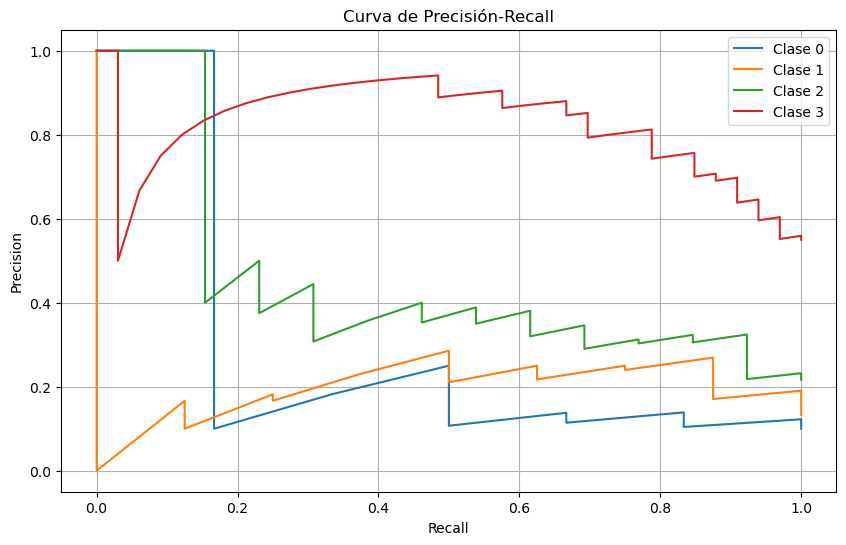

In [18]:
# Generar Curva de Precision del modelo
General.graficar_curva_precision_recall(cp_train_x, cp_train_y, cp_test_x, cp_test_y)